In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.signal as sig
import scipy

In [65]:
def matlab_style_gauss2D(shape,sigma):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [66]:
img = cv2.imread('IMGP2395.JPG',)

In [67]:
img[:,:,0]

array([[255, 255, 255, ..., 129, 128, 130],
       [255, 255, 255, ..., 127, 127, 126],
       [255, 255, 255, ..., 127, 128, 127],
       ..., 
       [127, 127, 127, ...,  98,  97,  97],
       [127, 126, 128, ...,  97,  97,  98],
       [127, 127, 129, ...,  96,  97,  99]], dtype=uint8)

In [68]:
img[:,:,1]

array([[255, 255, 255, ...,  64,  63,  62],
       [255, 255, 255, ...,  65,  64,  63],
       [255, 255, 255, ...,  65,  64,  63],
       ..., 
       [139, 139, 139, ..., 114, 114, 114],
       [139, 138, 140, ..., 114, 114, 115],
       [139, 139, 141, ..., 113, 112, 114]], dtype=uint8)

In [69]:
img=img[:,:,2].astype(int)

In [70]:
img

array([[255, 255, 255, ...,  26,  25,  27],
       [255, 255, 255, ...,  25,  26,  25],
       [255, 255, 255, ...,  27,  29,  28],
       ..., 
       [149, 149, 149, ..., 130, 127, 127],
       [149, 148, 150, ..., 127, 127, 128],
       [149, 149, 151, ..., 126, 128, 130]])

In [71]:
sigmaA=8
sigmaB=10

In [72]:
sigmaMax=max(sigmaA,sigmaB)
fsz=[sigmaMax, sigmaMax]

In [73]:
kernelA=matlab_style_gauss2D(fsz,sigmaA)
kernelB=matlab_style_gauss2D(fsz,sigmaB)


In [74]:
sum(map(sum, kernelA))

0.99999999999999989

In [75]:
sum(map(sum, kernelB))

0.99999999999999978

In [76]:
# imgA = sig.convolve2d(kernelA,img, boundary='symm', mode='same')
# imgB = sig.convolve2d(kernelB,img, boundary='symm', mode='same')

imgA=cv2.filter2D(img,-1,kernelA)
imgB=cv2.filter2D(img,-1,kernelB)

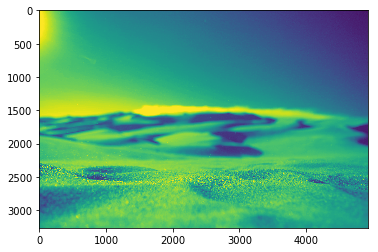

In [77]:
plt.imshow(img)

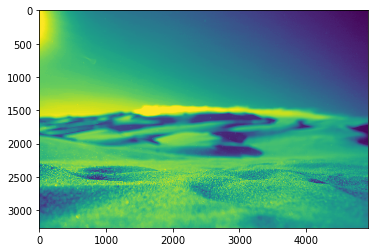

In [78]:
plt.imshow(imgA)

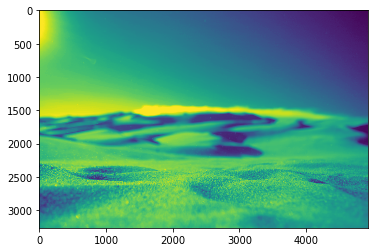

In [79]:
plt.imshow(imgB)

In [80]:
sum(map(sum, imgA))

2428317121

In [93]:
imgB.sum()

2428316631

In [94]:
R1=np.subtract(img,imgA)

In [95]:
max(map(max, R1))

138

In [96]:
R2=np.subtract(imgA,imgB)

In [103]:
R1

array([[ 0,  0,  0, ..., -1, -2, -1],
       [ 0,  0,  0, ..., -2, -1, -3],
       [ 0,  0,  0, ...,  0,  2,  1],
       ..., 
       [ 0,  0,  0, ...,  1, -2, -2],
       [ 0, -1,  1, ..., -2, -2, -1],
       [ 0,  0,  2, ..., -3, -1,  1]])

In [104]:
R2

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [105]:
# R1=R1.astype(int)

In [106]:
# R2=R2.astype(int)

In [107]:
R1.sum()

14994

In [108]:
R2.sum()

490

In [101]:
# R1=np.array([list( map(int,i) ) for i in R1])

In [102]:
# R2=np.array([list( map(int,i) ) for i in R2])

In [33]:
sum(map(sum, R1))

109882

In [34]:
sum(map(sum, R2))

14

In [109]:
R=np.zeros([len(R1),len(R1[0])])

In [110]:
for x in range(len(R)):
    for y in range(len(R[0])):
        if R2[x,y]==0:
            R[x,y]=0
        else:
            R[x,y]=R1[x,y]/R2[x,y]

In [112]:
R.sum()

2032055.0

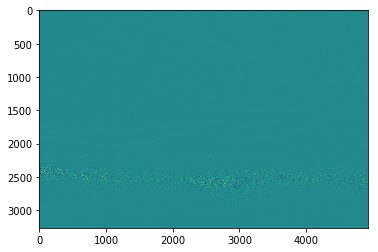

In [113]:
plt.imshow(R1)

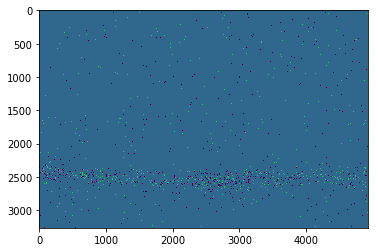

In [114]:
plt.imshow(R2)

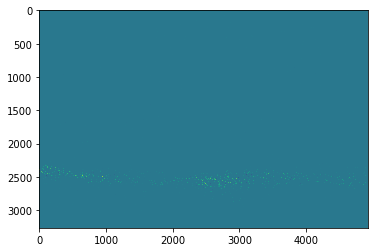

In [115]:
plt.imshow(R)

In [116]:
Rf=scipy.ndimage.maximum_filter(R,size=8)

In [117]:
len(Rf)

3264

In [118]:
len(Rf[0])

4928

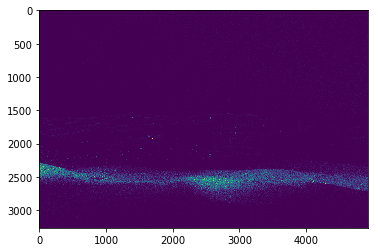

In [119]:
plt.imshow(Rf)

In [120]:
blurmap=np.divide((np.multiply(sigmaA,sigmaB)),(np.multiply((sigmaB-sigmaA),Rf)+sigmaB))


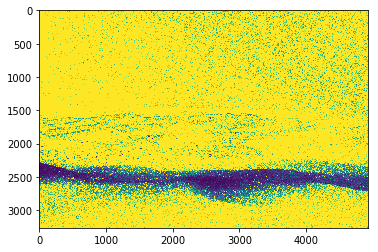

In [121]:
plt.imshow(blurmap)

In [47]:
np.array([1,2,3])/

SyntaxError: invalid syntax (<ipython-input-47-a7b4f3e1b8e5>, line 1)